# NLP Exercises!


## Read in text file
Create a function where the input is a filepath to a .txt document and the output is a single string with all the text from the document

In [2]:
def text_reader(text_file):
    
    """Read in a text file and return a string
    
    Keyword Arguments:
    text_file -- string that points to a .txt file on your computer"""
    
    lines = []
    with open(text_file, 'r') as file:
        for line in file:
            lines.append(line)
    return " ".join(lines) 

In [5]:
in_the_heart_of_the_country = '/Users/BaileyDanielson/Documents/Python/IHC.txt'

In [8]:
IHC_novel = text_reader(text_file = in_the_heart_of_the_country)

In [30]:
test_text = IHC_novel[0:500]
print(test_text)

J.M. Coetzee
 In the Heart of the Country
 
 
 
 
 1. Today my father brought home his new bride. They came clip-clop across
 the flats in a dog-cart drawn by a horse with an ostrich-plume waving on its
 forehead, dusty after the long haul. Or perhaps they were drawn by two
 plumed donkeys, that is also possible. My father wore his black swallowtail
 coat and stovepipe hat, his bride a wide-brimmed sunhat and a white dress
 tight at waist and throat. More detail I cannot give unless I begin to



## Tokenization
You need to decide how you want to split up your text.
- words
- sentences
- N Grams
- Custom Regex

>`from nltk import word_tokenize`

In [16]:
split_by_space = test_text.split()
print(split_by_space[0:10])

['J.M.', 'Coetzee', 'In', 'the', 'Heart', 'of', 'the', 'Country', '1.', 'Today']


In [18]:
from nltk import word_tokenize

In [22]:
split_by_tokenizer = word_tokenize(test_text)
print(split_by_tokenizer[0:10])

['J.M', '.', 'Coetzee', 'In', 'the', 'Heart', 'of', 'the', 'Country', '1']


The word tokenizer splits up periods

## Normalize Text
- clean out numbers
- clean out punctuation
- standardize case

In [26]:
def clean_text(lines):

    """Remove numbers and punctuation, and standardize case

    Keyword Arguments:
    lines: string of text"""
    
    lower_characters = lines.lower()
    approved_characters = []
    white_list = set('abcdefghijklmnopqrstuvwxyz ')
    
    for character in lower_characters:
        if character in white_list:
            approved_characters.append(character)
            
    return "".join(approved_characters)

In [28]:
test_clean = clean_text(lines = test_text)

## Remove Stop Words
This may not apply if you're interested in word count. But for anything else, it will probably be helpful to remove stop words.

>`from nltk.corpus import stopwords
>stop = set(stopwords.words('english'))`

In [29]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print(stop)

{'himself', 'during', 'aren', 'how', 'itself', 'can', 'll', 'had', 'than', 'your', 'about', 'myself', "you've", "shan't", "weren't", 'hadn', 'she', 'a', 'of', 's', 'didn', "wasn't", 'when', 'him', 'off', 'or', 'and', 'all', 'couldn', 'such', 'where', 'has', 'needn', 'was', 'through', 'hasn', 'on', 'with', 'weren', "she's", 'nor', 'by', 'under', 'y', 'shan', 've', "hasn't", 'for', "wouldn't", 'yourselves', 'same', 'is', 'mightn', 'the', 'her', 'then', 'both', 'my', 'yourself', 'there', 'it', 'they', 'here', 'into', "haven't", 'if', 'just', 'isn', 'o', 'be', 'at', 'ain', 'm', 'that', 'yours', 'what', 'themselves', 'once', 'd', 'you', 'most', 'not', 'shouldn', 'each', 'after', 'an', 'some', 'am', 'who', 'have', 'doing', 'no', "doesn't", 'over', "hadn't", 'been', "you'd", 'down', 'any', 'up', 're', 'do', 'until', "couldn't", 'will', 'wasn', 'these', 'its', "that'll", 'were', 'why', 'should', "aren't", 'theirs', 'only', 'out', 'which', 'as', 'below', 'further', "should've", 'don', 'this', "

In [33]:
import re

In [34]:
def clean_and_remove_stops(lines):

    """Remove numbers and punctuation, and standardize case

    Keyword Arguments:
    lines: string of text"""
    
    lower_characters = lines.lower()
    approved_words = []
    white_list = set('abcdefghijklmnopqrstuvwxyz ')
    
    for word in lower_characters.split():
        if word not in stop:
            clean_word = re.sub(r'[^a-z ]+', '', word)
            approved_words.append(clean_word)
            
    return " ".join(approved_words)

In [35]:
test_clean = clean_and_remove_stops(lines = test_text)
print(test_clean)

jm coetzee heart country  today father brought home new bride came clipclop across flats dogcart drawn horse ostrichplume waving forehead dusty long haul perhaps drawn two plumed donkeys also possible father wore black swallowtail coat stovepipe hat bride widebrimmed sunhat white dress tight waist throat detail cannot give unless begin


# Word Cloud

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [50]:
def generate_word_cloud(text):
    word_cloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")

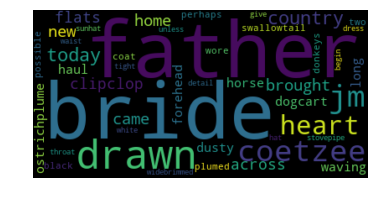

In [47]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(test_clean)
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
clean_IHC = clean_and_remove_stops(lines = IHC_novel)

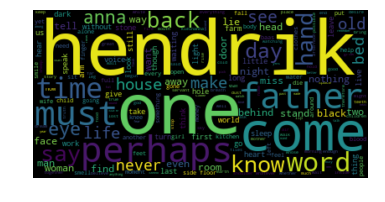

In [51]:
generate_word_cloud(clean_IHC)